In [70]:
import pytesseract
from pytesseract import Output
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
import re

# **Detecting the outlines**

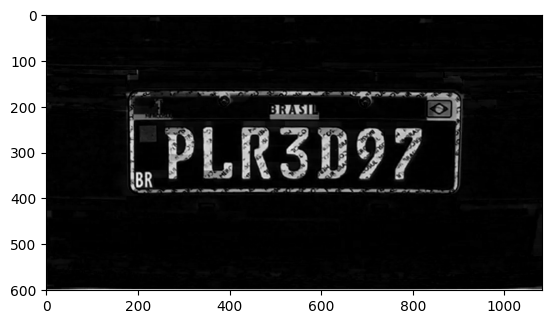

In [71]:
img = cv2.imread('itens/images/placa_carro1.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, lim_otsu = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

retangular_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))

black_hat = cv2.morphologyEx(imgGray, cv2.MORPH_BLACKHAT, retangular_kernel)
plt.imshow(black_hat, cmap='gray')

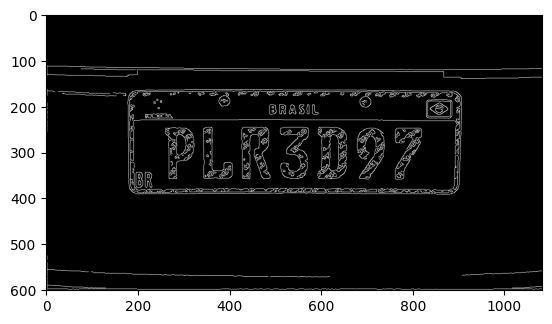

In [72]:
outline = cv2.Canny(imgGray, 100, 200)

plt.imshow(outline, cmap='gray')

In [73]:
outlines, hieararchie = cv2.findContours(outline, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

outlines

(array([[[1069,  593]],
 
        [[1068,  594]],
 
        [[1057,  594]],
 
        [[1056,  595]],
 
        [[1045,  595]],
 
        [[1044,  596]],
 
        [[1018,  596]],
 
        [[1044,  596]],
 
        [[1045,  595]],
 
        [[1056,  595]],
 
        [[1057,  594]],
 
        [[1068,  594]],
 
        [[1069,  593]],
 
        [[1082,  593]]], dtype=int32),
 array([[[490, 571]],
 
        [[489, 572]],
 
        [[490, 571]],
 
        [[517, 571]],
 
        [[518, 572]],
 
        [[519, 572]],
 
        [[520, 571]],
 
        [[548, 571]],
 
        [[549, 572]],
 
        [[553, 572]],
 
        [[554, 571]],
 
        [[565, 571]],
 
        [[566, 572]],
 
        [[568, 572]],
 
        [[569, 571]],
 
        [[570, 572]],
 
        [[572, 572]],
 
        [[573, 571]],
 
        [[576, 571]],
 
        [[577, 572]],
 
        [[587, 572]],
 
        [[588, 571]],
 
        [[590, 571]],
 
        [[591, 572]],
 
        [[601, 572]],
 
        [[602, 571]],
 

# **Cutting out with the outline**

In [74]:
for outline in outlines:
    # Criando a margem de erro 
    epsilon = 0.02*cv2.arcLength(outline, True)
    # Aproximando o contorno
    approx = cv2.approxPolyDP(outline, epsilon, True)
    # Verificando se o contorno é convexo e se possui 4 lados
    if cv2.isContourConvex(approx) and len(approx) == 4:
        locale = approx
        break


In [75]:
# Coordenadas da possivel placa
locale

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

## **Resume**
*find the contours of the image, approximate these contours to polygons and extract only the polygons that have 4 sides and are convex.*

In [76]:
# Extraindo todas as coordenadas da placa
x, y, w, h = cv2.boundingRect(locale)

In [77]:
print(f'x= {x}, y= {y}, w= {w}, h= {h}')

x= 180, y= 168, w= 722, h= 224


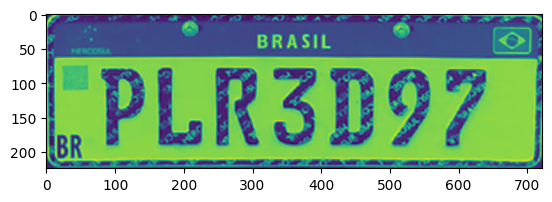

In [78]:
plate = imgGray[y:y+h, x:x+w]

plt.imshow(plate)

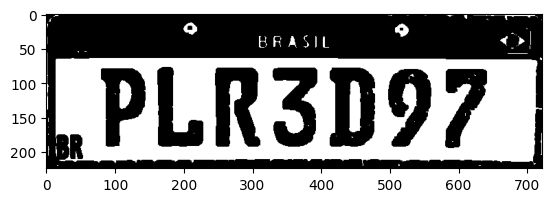

In [79]:
value, lim_otsu = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosing = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4)))
plt.imshow(erosing, cmap='gray')

In [80]:
config_tesseract = '--tessdata-dir "/usr/share/tesseract-ocr/4.00/tessdata" --psm 6'
txt = pytesseract.image_to_string(erosing, lang='por', config=config_tesseract)

print(f'Placa = {txt}')

Placa = PLR3D97.



## **Filtering the text using RE**

In [81]:
extracted_text = re.search('\w{3}\d{1}\w{1}\d{2}', txt)

extracted_text

<re.Match object; span=(0, 7), match='PLR3D97'>

In [82]:
print(f'Placa = {extracted_text.group()}')

Placa = PLR3D97
